<a href="https://colab.research.google.com/github/Noob919/Fellowship.ai_challenge/blob/main/sentiment_analysis_using_bert_with_ktrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fellowship.ai Challenge

This challenge question has multiple goals to achieve.

1. We have to perform Sentiment analysis on yelp-reviews- Polarity.
2. We have to do exploratory data analysis on given dataset.
3. We have to report final performance metrics.
4. We have to suggest ways in which our model can work better.

##  We are going to build Sentiment Analyzer based on bert model using ktrain.



In this notebook, we will make a NLP model on yelp-reviews dataset.In this dataset we have two sentiments namely 'Positive' or 'Negative' in the dataset they are denoted as 1 and 2 respectively.

The dataset can be downloaded directly from kaggle repository 
(	https://www.kaggle.com/irustandi/yelp-review-polarity/version/1?).

Every row in the dataset includes a reviews and rating.

For this challenge we are going to use ktrain which a lightweight wrapper for keras.This can be useful for project which consist of neural networks.We can do various task using ktrain like train, debug,deploy machine learning and deep learning models.
The main idea about ktrain is to biuld a machine learning learning framework like FASTAI.

We are going to use pretrained BERT(Bidirectional Encoder Representations from Transformers) model. Bert was developed by Google back in 2018. Bert change the whole NLP scenario like in the field of computer vision, researchers have repeatedly shown the value of transfer learning — pre-training a neural network model on a known task, for instance ImageNet, and then performing fine-tuning — using the trained neural network as the basis of a new purpose-specific model. In recent years, researchers have been showing that a similar technique can be useful in many natural language tasks.





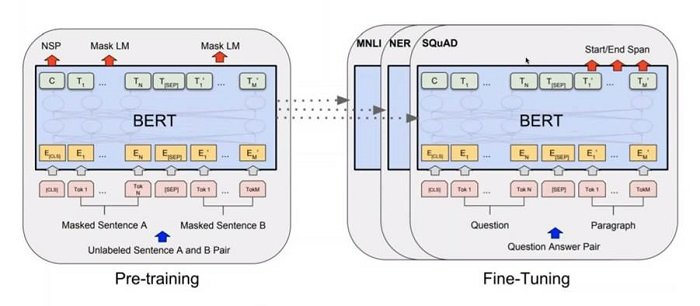

First of all, we required the ktrain wrapper in our enviroment.As i'm on Colab this can be done using the piece of code given below. 

In [ ]:
!pip install ktrain

Now, we are ready to use ktrain for our project.

Importing all other neceesary libraries.

In [3]:
import numpy as np # for handling array compuation
import pandas as pd # for handling data as a dataframe
import matplotlib.pyplot as plt #for visualization
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
import tensorflow as tf
import ktrain
from ktrain import text #Because we have text data

Now, we acquired dataset using my google drive link.We have two CSV file under the name of test.csv and train.csv

In [4]:
test_df  = pd.read_csv("/content/drive/MyDrive/kaggle/yelp_review_polarity_csv/test.csv")
train_df = pd.read_csv("/content/drive/MyDrive/kaggle/yelp_review_polarity_csv/train.csv")

Assigning the column names to dataframe

In [5]:
test_df.columns = ['Rating', 'Review']
train_df.columns = ['Rating', 'Review']

Replace 2 and 1 with the positive 'pos' and negative 'neg' string respectively

In [6]:
train_df['Rating'] = train_df['Rating'].replace(2,'pos')
test_df['Rating'] = test_df['Rating'].replace(2,'pos')

In [7]:
train_df['Rating'] = train_df['Rating'].replace(1,'neg')
test_df['Rating'] = test_df['Rating'].replace(1,'neg')

### Exploration of the  test data

Description of our train and test set.

In [10]:
train_df.describe()

,Rating,Review
count,559999,559999
unique,2,559999
top,pos,We walked in and were completely impressed by ...
freq,280000,1


In [12]:
test_df.describe()

,Rating,Review
count,37999,37999
unique,2,37999
top,neg,"What do you want from a sandwich shop? Well, i..."
freq,19000,1


Group test and train data using groupby method of pandas. 

In [14]:
train_df.groupby('Rating').describe()

Review                                                                
         count  unique                                                top freq
Rating                                                                        
neg     279999  279999  well, maybe it was the  time I went or what I ...    1
pos     280000  280000  It was easy to park my scooter here, but I wou...    1

In [15]:
test_df.groupby('Rating').describe()

Review                                                               
        count unique                                                top freq
Rating                                                                      
neg     19000  19000  Walked out! \n\nThe first restaurant I walked ...    1
pos     18999  18999  What do you want from a sandwich shop? Well, i...    1

## Data visualization

As we all know that diagrams or pictues give the better presentation or understanding of the data to the persons which are not from the same field of statistics or something.

So in this section we try to plot diiferent graphs using various python libraries.

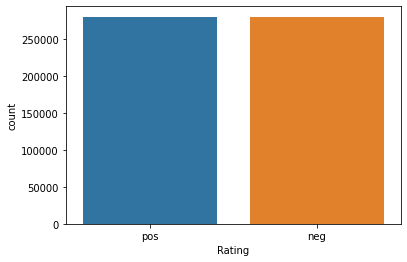

In [9]:
y=train_df['Review'].value_counts()
x=train_df['Rating']
sns.countplot(x)

As, we can say that the above countplot that test set is quite balanced.

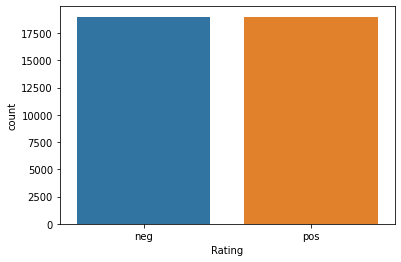

In [11]:
y=test_df['Review'].value_counts()
x=test_df['Rating']
sns.countplot(x)

Test dataset is also balanced.

Here we try to create a dataframe which is grouped by label called 'Rating' column of dataset

In [15]:
df = train_df.groupby(by = 'Rating').count()
df = pd.DataFrame(df)
px.funnel_area(names = ['negative', 'positive'], values = df['Review'])

In [16]:
df = test_df.groupby(by = 'Rating').count()
df = pd.DataFrame(df)
px.funnel_area(names = ['negative', 'positive'], values = df['Review'])

As we know that originally data contain about 5 lakhs datarows for training purpose and 3.5 thousands of test rows of data for testing.
So, i have to downsample the train set and test set because of limitations of avaible computaional resources.

I have taken about 10k rows for training and 4k rows for testing.

In [17]:
train_df = train_df[:10000]
test_df  = test_df[:4000]

Ktrain provide us with the facility of loading and preprocessing the data in the wrapper. Since the data we have is text data so in the modelling we are going to use the text from the ktrain. Also, as we have the data in pandas DataFrame, we can use module text_from_df to load it and preprocess it according to the BERT model.

In [18]:
(X_train, y_train),(X_test, y_test),preprocess = text.texts_from_df(train_df = train_df, 
                                                                    text_column = 'Review', 
                                                                    label_columns  = ['Rating'],
                                                                    val_df = test_df, 
                                                                    maxlen = 400, 
                                                                    preprocess_mode='bert')

['neg', 'pos']
   neg  pos
0  0.0  1.0
1  1.0  0.0
2  1.0  0.0
3  0.0  1.0
4  1.0  0.0
['neg', 'pos']
   neg  pos
0  1.0  0.0
1  0.0  1.0
2  1.0  0.0
3  0.0  1.0
4  0.0  1.0
downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


Now, after preprocessing of data. We can load our model and can create an instance of it that can be used for learning the model.

In [19]:
model = text.text_classifier('bert', (X_train, y_train) , preproc=preprocess)

Is Multi-Label? False
maxlen is 400
done.


To use ktrain, we simply wrap our model and data in a ktrain.Learner object using the get_learner function.

we have to use small batch size becuse if we you default batch size of 32 it will not git into the memory.

In [20]:
learner = ktrain.get_learner(model, 
                             train_data=(X_train, y_train), 
                             val_data=(X_test, y_test), 
                             batch_size=6)

Now, fit_onecycle method of learner object we train the neural network.Also we can use differnet learning rate and number of epochs for the training.  

fit_onecycle method (which employs a 1cycle policy). Both were proposed by Leslie Smith of the Naval Research Laboratory (NRL). The fit_onecyclemethod increases the learning rate from a base rate to a maximum rate for the first half of training and decays the learning rate to a near-zero value for the second half of training. The maximum learning rate is set using the aforementioned learning rate finder.

First Model with learning rate of 1e-5

In [ ]:
learner.fit_onecycle(1e-5, 1)



begin training using onecycle policy with max lr of 1e-05...
1667/1667 [==============================] - 2194s 1s/step - loss: 0.2462 - accuracy: 0.8939 - val_loss: 0.1233 - val_accuracy: 0.9535


Second Model with learning rate of 2e-5

In [23]:
learner.fit_onecycle(2e-5, 1)



begin training using onecycle policy with max lr of 2e-05...
1667/1667 [==============================] - 2380s 1s/step - loss: 0.2406 - accuracy: 0.8948 - val_loss: 0.1167 - val_accuracy: 0.9557


Due to limitation of time I set number of epochs to 1. For 1 epoch it take aroud 1.5 hours to train.

As, we can see that the model not a good fit for the problem. So we have to fine tune our model.

As learning rate is one of the most important hyperparameters to set in neural network.Training in a neural network involves minimizing a loss function. If the learning rate is too low, training will be slow or can stall. If the learning rate is too high, loss will not be minimized. Both cases adversely affect a model’s performance. To find an optimal learning rate for your model, one can simulate the training by starting with a low learning rate and gradually increasing it. Leslie Smith showed that, when plotting the learning rate versus the loss, the maximal learning rate associated with a still falling loss is a good choice for training. He referred to this as an LR Range Test (also known as an LR Finder). Following a similar syntax to that of the fastai library, this can be done in ktrain as follows:

In [ ]:
# learner.lr_find() 
# learner.lr_plot()

I'm not runing above lines of codes because it take about a day.But it will return us a plot. From the plot we can choose our optimal learning rate

# Conclusion

First model gave us acccuracy of **89.39% on train data** and **95.35% on validation data** and second model gave us accuracy of **89.48% on train data** and **95.57% on validation data**. The learning rate for the first model is **1e-5** and **2e-5** for the second model but the number of epochs are same for both the models.
But we can improve this model using different learning rates(which we can select from the graph) and also we can increase number of epochs.

## References



*   https://github.com/amaiya/ktrain
*   https://www.analyticsvidhya.com/blog/2019/09/demystifying-bert-groundbreaking-nlp-framework/


*   https://www.kaggle.com/aquib5559/1-6million-tweet-sentiment-analysis-using-bert
*   https://towardsdatascience.com/sentiment-analysis-in-10-minutes-with-bert-and-hugging-face-294e8a04b671


*   https://pypi.org/project/ktrain/








